In [2]:
#8x8 matrix is diag([0 1 2 3 4 5 6 7])

In [1]:
# initialization
from qiskit import *
import numpy as np
from math import pi
# importing Qiskit
from qiskit import IBMQ, Aer,ClassicalRegister
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.tools.visualization import circuit_drawer
# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
#TAKEN TOTAL 14 QUBITS

#q_0 is ancillary qubit
#q_1 2 3 12 13 are for controlled rotation (12 and 13 are for decomposition of 3 qubit controlled X gate only)
#q_1 2 3 are for eigenvalue storing
#q_10 11 are for 'and' operation in eigenvalue thresholding
#q_4 5 6 7 8 9 are for quantum state initialization

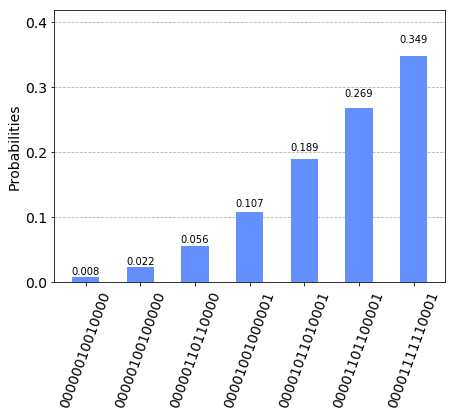

In [7]:
#initialization (correct)
qc_init=QuantumCircuit(14,14)

qc_init.ry(2.498,9)

qc_init.x(9)
qc_init.cu3(2.6,0,0,9,8)
qc_init.x(9)

qc_init.x(9)
qc_init.x(8)
qc_init.ccx(9,8,7)
qc_init.x(8)
qc_init.x(9)

qc_init.cu3(1.965,0,0,8,7) 
#0 part is over
#---------------------------
#qc_init.barrier()

qc_init.cu3(1.927,0,0,9,8)

qc_init.x(8)
qc_init.cu3(1.792/2,0,0,8,7)
qc_init.cx(9,8)
qc_init.cu3(-1.792/2,0,0,8,7)
qc_init.cx(9,8)
qc_init.cu3(1.792/2,0,0,9,7)
qc_init.x(8)

qc_init.cu3(1.724/2,0,0,8,7)
qc_init.cx(9,8)
qc_init.cu3(-1.724/2,0,0,8,7)
qc_init.cx(9,8)
qc_init.cu3(1.724/2,0,0,9,7)

#---------------------------
#qc_init.barrier()
qc_init.cx(9,6)
qc_init.cx(8,5)
qc_init.cx(7,4)

#qc_init.swap(4,9)
#qc_init.swap(5,8)
#qc_init.swap(6,7)

#qc_init.barrier()
#qc_init.draw('mpl')

#------------------------------------------

#phase estimation (Correct)
qc_PE=QuantumCircuit(14,14)

qc_PE.h(1)
qc_PE.h(2)
qc_PE.h(3)

#qc_PE.barrier()

qc_PE.cp(pi,3,7)

qc_PE.cp(pi,2,8)
qc_PE.cp(pi/2,2,7)

qc_PE.cp(pi,1,9)
qc_PE.cp(pi/2,1,8)
qc_PE.cp(pi/4,1,7)

#qc_PE.barrier()

qc_PE.swap(1,3)
qc_PE.h(1)
qc_PE.cu1(-pi/2,1,2)
qc_PE.h(2)
qc_PE.cu1(-pi/4,1,3)
qc_PE.cu1(-pi/2,2,3)
qc_PE.h(3)

#qc_PE.draw('mpl')

#-----------------------------------------
#threshold = 3
qc_CU=QuantumCircuit(14,14)
qc_CU.x(3)
qc_CU.ccx(2,3,10)
qc_CU.ccx(1,3,11)
qc_CU.x(3)
qc_CU.cx(10,2)
qc_CU.cx(11,1)

#------------------------------------------
qc_CR=QuantumCircuit(14,14)
qc_CR.x(1)
qc_CR.x(2)
qc_CR.x(3)

qc_CR.ccx(1,2,12)
qc_CR.ccx(3,12,13)
qc_CR.cx(13,0)
qc_CR.ccx(3,12,13)
qc_CR.ccx(1,2,12)

qc_CR.x(0)
qc_CR.x(1)
qc_CR.x(2)
qc_CR.x(3)

qc=qc_init+qc_PE+qc_CU+qc_CR+qc_CU.inverse()+qc_PE.inverse()
qc.draw('mpl')
for i in range(14):
    qc.measure(i,i)
    
#-------------------------------------
#measurement on qasm simulator

qasm_sim = Aer.get_backend('qasm_simulator')
shots = 2048
qobj = assemble(qc, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)